# **Summary: The script deals with image and video processing, including operations like motion detection, contour finding, and skeletonization. It utilizes libraries such as OpenCV, NumPy, imageio, skimage, SimpleITK, and itkwidgets.**

# **Mount your drive**

In [1]:
# mount drive to work with google drive
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)
%cd /content
os.chdir('/content/drive/MyDrive/AAAI/') #path was adjusted manually

Mounted at /content/drive/
/content


## **Install Libraries**

In [ ]:
!pip install imageio opencv-python


# **Upload yor GIF**

upload a GIF, save it to Google Drive, extract and save its frames, display both the GIF and its frames

In [ ]:
#Importing Libraries
import os
import cv2
import numpy as np
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt
from IPython.display import display, Image as IPImage
from google.colab import files

# Prompt user to upload GIF file
uploaded = files.upload()

# Get the name of the uploaded file
input_gif_name = list(uploaded.keys())[0]
print(input_gif_name)

# Ensure the file is saved in the specified directory
SAVE_DIRECTORY = "/content/drive/MyDrive/AAAI/"
save_path = os.path.join(SAVE_DIRECTORY, input_gif_name)
with open(save_path, 'wb') as f:
    f.write(uploaded[input_gif_name])

# Display the uploaded GIF
with open(save_path, "rb") as f:
    display(IPImage(data=f.read(), format='png'))

# Extract frames from the GIF
img = Image.open(save_path)
frames = [frame.copy() for frame in ImageSequence.Iterator(img)]
print(f"Number of frames in the GIF: {len(frames)}")

# Derive a directory to save the extracted frames
frame_save_directory = os.path.join(SAVE_DIRECTORY, "original_" + os.path.splitext(input_gif_name)[0])
if not os.path.exists(frame_save_directory):
    os.makedirs(frame_save_directory)

# Save frames
saved_paths = []
for idx, frame in enumerate(frames):
    frame_save_path = os.path.join(frame_save_directory, f"frame_{idx + 1}.png")
    frame.save(frame_save_path)
    saved_paths.append(frame_save_path)

# Display the saved frames
fig, axes = plt.subplots(1, len(frames), figsize=(50, 30))
for i, ax in enumerate(axes):
    ax.imshow(plt.imread(saved_paths[i]))
    ax.set_title(f"Frame {i + 1}")
    ax.axis('off')
plt.tight_layout()
plt.show()
print(frame_save_directory)
print(save_path)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-c67902ec4226>", line 4, in <cell line: 4>
    uploaded = files.upload()
  File "/usr/local/lib/python3.10/dist-packages/google/colab/files.py", line 69, in upload
    uploaded_files = _upload_files(multiple=True)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/files.py", line 156, in _upload_files
    result = _output.eval_js(
  File "/usr/local/lib/python3.10/dist-packages/google/colab/output/_js.py", line 40, in eval_js
    return _message.read_reply_from_input(request_id, timeout_sec)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_message.py", line 96, in read_reply_from_input
    time.sleep(0.025)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/

# **Create the contours**

# **Refining the contours to minimize noise. Trying at the same time
1. Gaussian Blur
2. Canny Edge Detection
3. Morphological Operations
4. Contour Approximation

In [ ]:
import imageio
import cv2
import numpy as np
import os
from IPython.display import Image

# Read the GIF file
frames = [frame for frame in imageio.get_reader(save_path)]

# Determine the maximum width and height across all frames
max_width = max([frame.shape[1] for frame in frames])
max_height = max([frame.shape[0] for frame in frames])

# Process each frame
outlines = []
for frame in frames:
    # Resize the frame with padding
    delta_w = max_width - frame.shape[1]
    delta_h = max_height - frame.shape[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    frame = cv2.copyMakeBorder(frame, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny Edge Detection
    edges = cv2.Canny(blurred, 50, 150)

    # Apply Morphological Operations
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=2)
    eroded = cv2.erode(dilated, kernel, iterations=2)

    # Find contours
    contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours
    outline = cv2.drawContours(frame.copy(), contours, -1, (0, 255, 0), 2)

    # Ensure the outline has only 3 channels (RGB)
    outline = outline[:, :, :3]

    outlines.append(outline)

# Save the frames with outlines as a new GIF
outline_save_directory =  os.path.join(SAVE_DIRECTORY, 'outlined_objects.gif')
imageio.mimsave(outline_save_directory, outlines, duration=0.1)

# Display the outlined GIF
Image(filename=outline_save_directory)


Output hidden; open in https://colab.research.google.com to view.

## **Only outline**

In [ ]:
!pip install opencv-python numpy pillow matplotlib


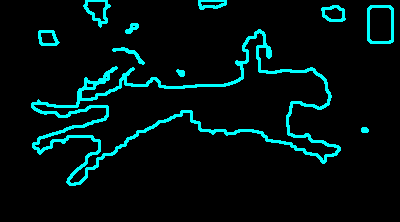

In [ ]:
import imageio
import cv2
import numpy as np
import os
from IPython.display import display, Image

# Read the GIF file
frames = [frame for frame in imageio.get_reader(save_path)]

# Determine the maximum width and height across all frames
max_width = max([frame.shape[1] for frame in frames])
max_height = max([frame.shape[0] for frame in frames])

# Process each frame
outlines = []
for frame in frames:
    # Resize the frame with padding
    delta_w = max_width - frame.shape[1]
    delta_h = max_height - frame.shape[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    frame = cv2.copyMakeBorder(frame, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny Edge Detection
    edges = cv2.Canny(blurred, 50, 150)

    # Apply Morphological Operations
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=2)
    eroded = cv2.erode(dilated, kernel, iterations=2)

    # Find contours
    contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank canvas
    blank_canvas = np.zeros_like(frame)

    # Draw contours on the blank canvas
    outline = cv2.drawContours(blank_canvas, contours, -1, (0, 255, 255), 2)  # Yellow color

    # Ensure the outline has only 3 channels (RGB)
    outline = outline[:, :, :3]

    outlines.append(outline)

# Save the frames with outlines as a new GIF
outline_save_directory = os.path.join(SAVE_DIRECTORY, 'outlined_objects_yellow.gif')
imageio.mimsave(outline_save_directory, outlines, duration=0.1, format='GIF')

# Display the outlined GIF
with open(outline_save_directory, "rb") as f:
    display(Image(data=f.read(), format="png"))


## **Skeletonization**


Skeletonization is a process used to reduce binary shapes to a skeletal remnant that largely preserves the extent and connectivity of the original shape while throwing away most of the original foreground pixels. There are several types and methods of skeletonization, each with its own characteristics and use cases. Below are some of the commonly used types and methods:

1. Thinning:
Zhang-Suen Algorithm: A classical thinning algorithm that iteratively removes border pixels.
Guo-Hall Algorithm: Another iterative thinning algorithm with a different set of conditions for pixel removal.
2. Distance Transform + Peak Detection:
In this method, the distance transform of the binary image is computed first. Then, the skeleton is obtained by detecting the ridges or peaks in the distance map.
3. Voronoi Skeleton:
The Voronoi diagram of the background pixels is computed, and the skeleton is formed by the points that are equidistant to two or more nearest background pixels.
4. Medial Axis Transform:
This is similar to the distance transform method but specifically finds the medial axis of the shape, which is a set of all points having more than one closest point on the object’s boundary.
5. Topological Skeleton:
This method ensures that the topology of the original shape is preserved, making it useful for shape analysis and recognition.
6. Morphological Skeleton:
This method uses morphological operations (erosion and opening) to iteratively thin the binary image until the skeleton remains.
7. Ridge-based Methods:
These methods detect the ridges in the intensity image or the gradient magnitude image to find the skeleton.
8. Hamilton-Jacobi Skeleton:
This method uses the solutions of the Hamilton-Jacobi equations to compute the skeleton.
Each of these methods has its own advantages and disadvantages, and the choice of method depends on the specific requirements of the application. Some methods may preserve the topology better, while others may be faster or more robust to noise. It is often useful to experiment with different methods to find the one that works best for your particular use case.

In [ ]:
!pip install opencv-python


# ** - runs for a long time, can measure time complexity**

In [ ]:
import imageio
import numpy as np
import cv2
from skimage import morphology, img_as_ubyte, color
import os

frames = [frame for frame in imageio.get_reader(save_path)]

# Process each frame
skeleton_frames = []
for frame in frames:
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Binarize the image
    _, binary_frame = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(binary_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty mask to draw the filled contours
    mask = np.zeros_like(binary_frame)

    # Draw filled contours
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Skeletonize the filled contours
    skeleton = morphology.skeletonize(mask // 255)  # Convert to binary [0, 1]
    skeleton = img_as_ubyte(skeleton)  # Convert back to [0, 255]

    # Create an RGB version of the skeleton
    skeleton_rgb = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2RGB)

    # Overlay the skeleton onto the original image
    result = cv2.addWeighted(frame, 1, skeleton_rgb, 0.5, 0)

    skeleton_frames.append(result)
skeleton_save_directory2 = os.path.join(SAVE_DIRECTORY, 'outlined_objects_yellow2.gif')
# Save the frames with skeletons as a new GIF
imageio.mimsave(skeleton_save_directory2, skeleton_frames, duration=0.1)

# Display the skeleton GIF
skeleton_save_directory2
from IPython.display import display, Image

# Display the outlined GIF
display(Image(filename=skeleton_save_directory2))


error: ignored

In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt

# Load the GIF
img = Image.open(save_path)
frames = [frame.copy() for frame in ImageSequence.Iterator(img)]

# Initialize the MOG2 background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2()

# Process all frames in the GIF
all_foreground_frames = []
for frame in frames:
    frame_np = np.array(frame)
    if frame_np.shape[-1] == 4:
        frame_np = cv2.cvtColor(frame_np, cv2.COLOR_RGBA2RGB)
    fgmask = fgbg.apply(frame_np)
    foreground = cv2.bitwise_and(frame_np, frame_np, mask=fgmask)
    all_foreground_frames.append(foreground)

# Kernel for dilation
kernel = np.ones((3,3), np.uint8)

# Extract and refine contours of the foreground objects for all frames
radius_threshold = 50
filtered_contour_frames = []
for frame in all_foreground_frames:
    if frame.shape[-1] == 3:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    else:
        gray_frame = frame
    _, thresh = cv2.threshold(gray_frame, 1, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, kernel, iterations=2)
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = np.zeros_like(gray_frame)
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] == 0:
            continue
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        centroid = np.array([cX, cY])
        distances = np.linalg.norm(contour - centroid, axis=2)
        if np.all(distances < radius_threshold):
            continue
        cv2.drawContours(contour_image, [contour], -1, 255, 2)
    filtered_contour_frames.append(contour_image)

# Display the first 6 filtered contour frames in a 2x3 grid
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, contour_frame in enumerate(filtered_contour_frames[:6]):
    row = i // 3
    col = i % 3
    ax[row, col].imshow(contour_frame, cmap='gray')
    ax[row, col].axis('off')
    ax[row, col].set_title(f"Contour Frame {i + 1}")
plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageSequence
import imageio

# Load the GIF
img = Image.open(save_path)
frames = [frame.copy() for frame in ImageSequence.Iterator(img)]

# Initialize the MOG2 background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2()

# Process all frames in the GIF
all_foreground_frames = []
for frame in frames:
    frame_np = np.array(frame)
    if frame_np.shape[-1] == 4:
        frame_np = cv2.cvtColor(frame_np, cv2.COLOR_RGBA2RGB)
    fgmask = fgbg.apply(frame_np)
    foreground = cv2.bitwise_and(frame_np, frame_np, mask=fgmask)
    all_foreground_frames.append(foreground)

# Kernel for dilation
kernel = np.ones((3,3), np.uint8)

# Extract and refine contours of the foreground objects for all frames
radius_threshold = 50
filtered_contour_frames = []
for frame in all_foreground_frames:
    if frame.shape[-1] == 3:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    else:
        gray_frame = frame
    _, thresh = cv2.threshold(gray_frame, 1, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, kernel, iterations=2)
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = np.zeros_like(gray_frame)
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] == 0:
            continue
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        centroid = np.array([cX, cY])
        distances = np.linalg.norm(contour - centroid, axis=2)
        if np.all(distances < radius_threshold):
            continue
        cv2.drawContours(contour_image, [contour], -1, 255, 2)
    filtered_contour_frames.append(contour_image)

# Save the frames with filtered contours as a new GIF
output_gif_path = "filtered_contours.gif"
imageio.mimsave(output_gif_path, filtered_contour_frames, duration=0.1)

print("Filtered contours GIF saved at:", output_gif_path)

# Display the outlined GIF
Image(filename=output_gif_path)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-49-7866a36a4e26>", line 48, in <cell line: 48>
    imageio.mimsave(output_gif_path, filtered_contour_frames, duration=0.1)
  File "/usr/local/lib/python3.10/dist-packages/imageio/v2.py", line 494, in mimwrite
    with imopen(uri, "wI", **imopen_args) as file:
  File "/usr/local/lib/python3.10/dist-packages/imageio/core/imopen.py", line 113, in imopen
    request = Request(uri, io_mode, format_hint=format_hint, extension=extension)
  File "/usr/local/lib/python3.10/dist-packages/imageio/core/request.py", line 247, in __init__
    self._parse_uri(uri)
  File "/usr/local/lib/python3.10/dist-packages/imageio/core/request.py", line 397, in _parse_uri
    self._filename = os.path.abspath(self._filename)
  File "/usr/lib/python3.10/posixpath.py", line 384, in abspath
    cwd = o

In [ ]:
import imageio
import cv2
import numpy as np
import os

def zhang_suen_thinning(img):
    """
    Apply the Zhang-Suen thinning algorithm on a binary image.

    Parameters:
    img (np.ndarray): Binary image

    Returns:
    np.ndarray: Thinned image
    """
    img = img.copy()
    height, width = img.shape
    img[img > 0] = 1
    change = True
    while change:
        change = False
        to_remove = []
        for i in range(1, height-1):
            for j in range(1, width-1):
                p2,p3,p4 = img[i-1,j], img[i-1,j+1], img[i,j+1]
                p5,p6,p7 = img[i+1,j+1], img[i+1,j], img[i+1,j-1]
                p8,p9,p1 = img[i,j-1], img[i-1,j-1], img[i-1,j]
                if (img[i,j] == 1 and
                    2 <= sum([p1,p2,p3,p4,p5,p6,p7,p8,p9]) <= 6 and
                    (p1,p2,p3,p4,p5,p6,p7,p8,p9).count(1) == 1 and
                    p1*p3*p7 == 0 and
                    p1*p5*p7 == 0):
                    to_remove.append((i,j))
        for i,j in to_remove:
            img[i,j] = 0
            change = True

        to_remove = []
        for i in range(1, height-1):
            for j in range(1, width-1):
                p2,p3,p4 = img[i-1,j], img[i-1,j+1], img[i,j+1]
                p5,p6,p7 = img[i+1,j+1], img[i+1,j], img[i+1,j-1]
                p8,p9,p1 = img[i,j-1], img[i-1,j-1], img[i-1,j]
                if (img[i,j] == 1 and
                    2 <= sum([p1,p2,p3,p4,p5,p6,p7,p8,p9]) <= 6 and
                    (p1,p2,p3,p4,p5,p6,p7,p8,p9).count(1) == 1 and
                    p1*p3*p5 == 0 and
                    p3*p5*p7 == 0):
                    to_remove.append((i,j))
        for i,j in to_remove:
            img[i,j] = 0
            change = True

    return img

def process_frame(frame):
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Apply binary threshold
    _, binary_frame = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)

    # Invert colors if objects are in black
    binary_frame = cv2.bitwise_not(binary_frame)

    # Apply Zhang-Suen thinning
    skeleton_frame = zhang_suen_thinning(binary_frame)

    return skeleton_frame

# Load the GIF file
gif_path = outline_save_directory
frames = [frame for frame in imageio.get_reader(gif_path)]

# Process each frame
processed_frames = [process_frame(frame) for frame in frames]

# Save the frames with skeletons as a new GIF
skeleton_gif_save_directory = os.path.join(SAVE_DIRECTORY, 'skeleton1.gif')

imageio.mimsave(skeleton_gif_save_directory, processed_frames, duration=0.1)

print("Skeleton GIF saved at:", skeleton_gif_save_directory)
# Display the outlined GIF
Image(filename=skeleton_gif_save_directory)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Skeleton GIF saved at: /content/drive/MyDrive/AAAI/skeleton.gif
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-49-169eb4bcabcc>", line 99, in <cell line: 99>
    convert_gif_to_skeleton(save_path, SAVE_DIRECTORY)
  File "<ipython-input-49-169eb4bcabcc>", line 96, in convert_gif_to_skeleton
    display(Image(filename=skeleton_gif_save_directory))
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File 

## **With circle**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ... (previous code)

# Process each frame to plot only the outline points
for i, frame in enumerate(outlines):
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Threshold to get the contours
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank image
    blank_image = np.zeros_like(frame)

    # Draw the contours
    cv2.drawContours(blank_image, contours, -1, (0, 255, 0), 1)

    # Convert to RGB (OpenCV uses BGR by default)
    blank_image = cv2.cvtColor(blank_image, cv2.COLOR_BGR2RGB)

    # Plot the image
    plt.imshow(blank_image)
    plt.axis('off')
    plt.show()


In [ ]:
import imageio
import cv2
import numpy as np
import os
from IPython.display import Image
import matplotlib.pyplot as plt

# Function to draw a line using Bresenham's algorithm
def bresenham_line(x0, y0, x1, y1):
    points = []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    x, y = x0, y0
    sx = -1 if x0 > x1 else 1
    sy = -1 if y0 > y1 else 1
    if dx > dy:
        err = dx / 2.0
        while x != x1:
            points.append((x, y))
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2.0
        while y != y1:
            points.append((x, y))
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy
    points.append((x, y))
    return points

# Function to draw a line on an image
def draw_line(img, x0, y0, x1, y1, color):
    for x, y in bresenham_line(x0, y0, x1, y1):
        if 0 <= x < img.shape[1] and 0 <= y < img.shape[0]:
            if np.any(img[int(y), int(x)] != [255, 255, 255]):  # Stop if not background color
                break
            img[int(y), int(x)] = color

# Read the GIF file
frames = [frame for frame in imageio.get_reader(outline_save_directory)]

# Determine the maximum width and height across all frames
max_width = max([frame.shape[1] for frame in frames])
max_height = max([frame.shape[0] for frame in frames])

# Generate a set of distinguishable colors
num_colors = 10
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))[:, :3]  # Taking only R, G, B channels
colors = (colors * 255).astype(np.uint8)

# Process each frame
colored_objects_frames = []
for frame in frames:
    # Resize the frame with padding
    delta_w = max_width - frame.shape[1]
    delta_h = max_height - frame.shape[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    frame = cv2.copyMakeBorder(frame, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny Edge Detection
    edges = cv2.Canny(blurred, 50, 150)

    # Apply Morphological Operations
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=2)
    eroded = cv2.erode(dilated, kernel, iterations=2)

    # Find contours
    contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the frame to color the objects
    colored_objects = frame.copy()

    # Color each object
    for i, contour in enumerate(contours):
        color = colors[i % num_colors].tolist()
        cv2.drawContours(colored_objects, [contour], -1, color, -1)

    # Identify the largest contour based on the area
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw the enclosing circle of the largest contour in blue
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    cv2.circle(colored_objects, (int(x), int(y)), int(radius), (255, 0, 0), 2)

    # Draw lines from the center to every 10th pixel of the largest contour
    for i in range(0, len(largest_contour), 10):
        px, py = largest_contour[i][0]
        draw_line(colored_objects, int(x), int(y), px, py, (0, 255, 0))

    colored_objects_frames.append(colored_objects)

# Save the frames with colored objects as a new GIF
colored_objects_save_directory = os.path.join(SAVE_DIRECTORY, 'colored_and_highlighted_objects.gif')
imageio.mimsave(colored_objects_save_directory, colored_objects_frames, duration=0.1)

# Display the colored objects GIF
Image(filename=colored_objects_save_directory)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-968871150e7a>", line 104, in <cell line: 104>
    Image(filename=colored_objects_save_directory)
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.

In [ ]:
import imageio
import cv2
import numpy as np
import os
from IPython.display import Image
import matplotlib.pyplot as plt

# Read the GIF file
frames = [frame for frame in imageio.get_reader(save_path)]

# Determine the maximum width and height across all frames
max_width = max([frame.shape[1] for frame in frames])
max_height = max([frame.shape[0] for frame in frames])

# Generate a set of distinguishable colors
num_colors = 10
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))[:, :3]  # Taking only R, G, B channels
colors = (colors * 255).astype(np.uint8)

# Process each frame
colored_objects_frames = []
for frame in frames:
    # Resize the frame with padding
    delta_w = max_width - frame.shape[1]
    delta_h = max_height - frame.shape[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    frame = cv2.copyMakeBorder(frame, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny Edge Detection
    edges = cv2.Canny(blurred, 50, 150)

    # Apply Morphological Operations
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=2)
    eroded = cv2.erode(dilated, kernel, iterations=2)

    # Find contours
    contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the frame to color the objects
    colored_objects = frame.copy()

    # Color each object
    for i, contour in enumerate(contours):
        color = colors[i % num_colors].tolist()
        cv2.drawContours(colored_objects, [contour], -1, color, -1)

    colored_objects_frames.append(colored_objects)

# Save the frames with colored objects as a new GIF
colored_objects_save_directory = os.path.join(SAVE_DIRECTORY, 'outlined_objects.gif')
imageio.mimsave(colored_objects_save_directory, colored_objects_frames, duration=0.1)

# Display the colored objects GIF
Image(filename=colored_objects_save_directory)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-ab428231c0bc>", line 52, in <cell line: 52>
    imageio.mimsave(colored_objects_save_directory, colored_objects_frames, duration=0.1)
  File "/usr/local/lib/python3.10/dist-packages/imageio/v2.py", line 495, in mimwrite
    return file.write(ims, is_batch=True, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/imageio/plugins/pillow.py", line 398, in write
    ndimage = np.stack(ndimage, axis=0)
  File "<__array_function__ internals>", line 180, in stack
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py", line 426, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape

During handling of the above exception, another exception occurred:

Traceback (most recent call 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



OSError: [Errno 107] Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-ab428231c0bc>", line 52, in <cell line: 52>
    imageio.mimsave(colored_objects_save_directory, colored_objects_frames, duration=0.1)
  File "/usr/local/lib/python3.10/dist-packages/imageio/v2.py", line 495, in mimwrite
    return file.write(ims, is_batch=True, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/imageio/plugins/pillow.py", line 398, in write
    ndimage = np.stack(ndimage, axis=0)
  File "<__array_function__ internals>", line 180, in stack
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py", line 426, in stack
    raise ValueError('all input arrays must have the same shape')
ValueError: all input arrays must have the same shape

During handling of the above exception, 

## **Skeletonization**

In [ ]:
import imageio
import numpy as np
import cv2
from skimage import morphology, color
import os
from IPython.display import Image

# Path to the GIF file with outlined objects
outlined_objects_gif_path = colored_objects_save_directory

# Directory to save the skeleton GIF
if not os.path.exists(SAVE_DIRECTORY):
    os.makedirs(SAVE_DIRECTORY)

# Read the GIF file
frames = [frame for frame in imageio.get_reader(outlined_objects_gif_path)]

# Process each frame to create a skeleton
skeleton_frames = []
for frame in frames:
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Binarize the image
    _, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Perform skeletonization
    skeleton = morphology.skeletonize(binary // 255) * 255
    skeleton = skeleton.astype(np.uint8)

    # Convert the skeleton back to an RGB image
    skeleton_rgb = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2RGB)

    skeleton_frames.append(skeleton_rgb)

# Save the frames with skeletons as a new GIF
skeleton_save_directory = os.path.join(SAVE_DIRECTORY, 'skeleton_objects.gif')
imageio.mimsave(skeleton_save_directory, skeleton_frames, duration=0.1)

# Display the skeleton GIF
Image(filename=skeleton_save_directory)

# Display the colored objects GIF
Image(filename=skeleton_save_directory)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-c0c6a93886ea>", line 34, in <cell line: 34>
    Image(filename=skeleton_save_directory)
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-p

In [ ]:
!pip install opencv-python-headless numpy matplotlib scikit-image
!pip install imageio[ffmpeg] numpy matplotlib scikit-image


In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology, color, img_as_ubyte

# Read the GIF file
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Process each frame
skeleton_frames = []
for frame in frames:
    # Convert the frame to grayscale
    gray_frame = color.rgb2gray(frame)

    # Binarize the image
    binary_frame = np.where(gray_frame > 0.5, 1, 0).astype(np.uint8)

    # Perform skeletonization
    skeleton = morphology.skeletonize(binary_frame)

    # Convert the skeleton back to an RGB image
    skeleton_rgb = img_as_ubyte(color.gray2rgb(skeleton))

    skeleton_frames.append(skeleton_rgb)

# Save the frames with skeletons as a new GIF
skeleton_save_directory = os.path.join(SAVE_DIRECTORY, 'skeleton_objects.gif')
imageio.mimsave(skeleton_save_directory, skeleton_frames, duration=0.1)

# Display the skeleton GIF
skeleton_save_directory

# Display the colored objects GIF
Image(filename=skeleton_save_directory)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-f3fa755210a9>", line 9, in <cell line: 7>
    gray_frame = color.rgb2gray(frame)
AttributeError: 'list' object has no attribute 'rgb2gray'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/pyth

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, morphology, color

# Load the image
image_path = ''
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Binarize the image
_, binary_image = cv2.threshold(gray_image, 0.5, 1, cv2.THRESH_BINARY)

# Perform skeletonization
skeleton = morphology.skeletonize(binary_image)

# Show the results
fig, axes = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(gray_image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(binary_image, cmap=plt.cm.gray)
ax[1].set_title('Binary')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].set_title('Skeleton')
ax[2].axis('off')

fig.tight_layout()
plt.show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-5cc4767a1f04>", line 3, in <cell line: 3>
    image = io.imread(image_path)
  File "/usr/local/lib/python3.10/dist-packages/skimage/io/_io.py", line 53, in imread
    img = call_plugin('imread', fname, plugin=plugin, **plugin_args)
  File "/usr/local/lib/python3.10/dist-packages/skimage/io/manage_plugins.py", line 207, in call_plugin
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/imageio_plugin.py", line 15, in imread
    return np.asarray(imageio_imread(*args, **kwargs))
  File "/usr/local/lib/python3.10/dist-packages/imageio/v2.py", line 359, in imread
    with imopen(uri, "ri", **imopen_args) as file:
  File "/usr/local/lib/python3.10/dist-packages/imageio/core/imopen.py", line 113, in imopen
    request = Reques

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-5cc4767a1f04>", line 3, in <cell line: 3>
    image = io.imread(image_path)
  File "/usr/local/lib/python3.10/dist-packages/skimage/io/_io.py", line 53, in imread
    img = call_plugin('imread', fname, plugin=plugin, **plugin_args)
  File "/usr/local/lib/python3.10/dist-packages/skimage/io/manage_plugins.py", line 207, in call_plugin
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/imageio_plugin.py", line 15, in imread
    return np.asarray(imageio_imread(*args, **kwargs))
  File "/usr/local/lib/python3.10/dist-packages/imageio/v2.py", line 359, in imread
    with imopen(uri, "ri", **imopen_args) as file:
  File "/usr/local/lib/python3.10/dist-packages/imageio/core/imopen.py", line 113, in imopen
    request = Reques

In [ ]:
import imageio
import cv2
import os
import numpy as np

def find_intersection(line_point, line_dir, contour):
    closest_point = None
    min_distance = float('inf')

    for i in range(len(contour)):
        contour_point = contour[i][0]

        # Calculate the vector from the line point to the contour point
        to_contour = contour_point - line_point

        # Project the vector onto the line direction to find the closest point on the line
        projection = np.dot(to_contour, line_dir) * line_dir
        closest_point_on_line = line_point + projection

        # Calculate the distance from the contour point to the line
        distance = np.linalg.norm(closest_point_on_line - contour_point)

        # Update if this is the closest point found so far
        if distance < min_distance:
            min_distance = distance
            closest_point = contour_point

    return closest_point

# Load the GIF using imageio
gif = imageio.mimread(outline_save_directory)

processed_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identify the largest contour based on the area
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw the enclosing circle of the largest contour in blue
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    center = np.array([x, y])
    cv2.circle(image, (int(x), int(y)), int(radius), (255, 0, 0), 2)

    # Draw lines from the center to every 10th pixel of the largest contour
    for i in range(0, len(largest_contour), 10):
        contour_point = largest_contour[i][0]
        line_dir = contour_point - center
        line_dir /= np.linalg.norm(line_dir)

        intersection = find_intersection(center, line_dir, largest_contour)

        if intersection is not None:
            cv2.line(image, (int(x), int(y)), tuple(intersection), (0, 255, 0), 1)

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    processed_frames.append(processed_frame)

# Save the modified image
imageio.mimsave(os.path.join(SAVE_DIRECTORY, 'modified_outlined_objects_within_contour.gif'), processed_frames, duration=0.1)
# Display the outlined GIF
Image(filename='modified_outlined_objects_within_contour.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-90f5abcc92e7>", line 70, in <cell line: 70>
    Image(filename='modified_outlined_objects_within_contour.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/loca

In [ ]:
import imageio
import cv2
import numpy as np
import os
from IPython.display import Image

# Read the GIF file
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Determine the maximum width and height across all frames
max_width = max([frame.shape[1] for frame in frames])
max_height = max([frame.shape[0] for frame in frames])

# Process each frame
outlines = []
for frame in frames:
    # Resize the frame with padding
    delta_w = max_width - frame.shape[1]
    delta_h = max_height - frame.shape[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    frame = cv2.copyMakeBorder(frame, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Apply morphological closing
    kernel = np.ones((5, 5), np.uint8)
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Approximate contours
    epsilon = 0.02 * cv2.arcLength(contours[0], True)
    approx_contours = [cv2.approxPolyDP(cnt, epsilon, True) for cnt in contours]

    # Draw contours
    outline = cv2.drawContours(frame.copy(), approx_contours, -1, (0, 255, 0), 2)

    # Ensure the outline has only 3 channels (RGB)
    outline = outline[:, :, :3]

    outlines.append(outline)

# Save the frames with outlines as a new GIF
outline_save_directory = os.path.join(SAVE_DIRECTORY, 'outlined_objects_approx.gif')
imageio.mimsave(outline_save_directory, outlines, duration=0.1)
print(outline_save_directory)

# Display the outlined GIF
Image(filename=outline_save_directory)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



/content/drive/MyDrive/AAAI/outlined_objects_approx.gif
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-18aa436cec2e>", line 53, in <cell line: 53>
    Image(filename=outline_save_directory)
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_conte

In [ ]:
import imageio
import cv2
import numpy as np
import os
from IPython.display import Image

# Read the GIF file
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Determine the maximum width and height across all frames
max_width = max([frame.shape[1] for frame in frames])
max_height = max([frame.shape[0] for frame in frames])

# Define the yellow color as a tuple of BGR values and transparency level
yellow = (0, 255, 255)  # BGR for yellow
transparency = 0.5

# Process each frame
outlines = []
for frame in frames:
    # Resize the frame with padding
    delta_w = max_width - frame.shape[1]
    delta_h = max_height - frame.shape[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    frame = cv2.copyMakeBorder(frame, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Apply morphological closing
    kernel = np.ones((5, 5), np.uint8)
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Approximate the largest contour
    epsilon = 0.02 * cv2.arcLength(largest_contour, True)
    approx_contour = cv2.approxPolyDP(largest_contour, epsilon, True)

    # Draw the largest contour
    outline = cv2.drawContours(frame.copy(), [approx_contour], -1, (0, 255, 0), 2)

    # Create a yellow overlay
    overlay = np.full_like(outline, yellow)

    # Apply the yellow overlay to the largest object
    cv2.drawContours(overlay, [approx_contour], -1, yellow, -1)

    # Blend the overlay with the original image
    blended = cv2.addWeighted(outline, 1 - transparency, overlay, transparency, 0)

    outlines.append(blended)

# Save the frames with outlines as a new GIF
outline_save_directory = os.path.join(SAVE_DIRECTORY, 'outlined_largest_object_yellow_overlay_approx.gif')
imageio.mimsave(outline_save_directory, outlines, duration=0.1)
print(outline_save_directory)

# Display the outlined GIF
Image(filename=outline_save_directory)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-c8f4a197d194>", line 50, in <cell line: 15>
    overlay = np.full_like(outline, yellow)
  File "<__array_function__ internals>", line 180, in full_like
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py", line 423, in full_like
    multiarray.copyto(res, fill_value, casting='unsafe')
  File "<__array_function__ internals>", line 180, in copyto
ValueError: could not broadcast input array from shape (3,) into shape (222,400,4)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

Dur

In [ ]:
import imageio
import cv2
import numpy as np
import os
from IPython.display import Image

# Read the GIF file
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Determine the maximum width and height across all frames
max_width = max([frame.shape[1] for frame in frames])
max_height = max([frame.shape[0] for frame in frames])

# Define the yellow color as a tuple of BGR values and transparency level
yellow = (0, 255, 255)  # BGR for yellow
transparency = 0.5

# Process each frame
outlines = []
for frame in frames:
    # Resize the frame with padding
    delta_w = max_width - frame.shape[1]
    delta_h = max_height - frame.shape[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    frame = cv2.copyMakeBorder(frame, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Apply morphological closing
    kernel = np.ones((5, 5), np.uint8)
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Approximate the largest contour
    epsilon = 0.02 * cv2.arcLength(largest_contour, True)
    approx_contour = cv2.approxPolyDP(largest_contour, epsilon, True)

    # Draw the largest contour
    outline = cv2.drawContours(frame.copy(), [approx_contour], -1, (0, 255, 0), 2)

    # Create a yellow overlay
    overlay = np.full_like(outline, yellow)

    # Apply the yellow overlay to the largest object
    cv2.drawContours(overlay, [approx_contour], -1, yellow, -1)

    # Blend the overlay with the original image
    blended = cv2.addWeighted(outline, 1 - transparency, overlay, transparency, 0)

    outlines.append(blended)

# Save the frames with outlines as a new GIF
outline_save_directory = os.path.join(save_directory, 'outlined_largest_object_yellow_overlay.gif')
imageio.mimsave(outline_save_directory, outlines, duration=0.1)
print(outline_save_directory)

# Display the outlined GIF
Image(filename=outline_save_directory)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-c3b8d7fbd86b>", line 50, in <cell line: 15>
    overlay = np.full_like(outline, yellow)
  File "<__array_function__ internals>", line 180, in full_like
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py", line 423, in full_like
    multiarray.copyto(res, fill_value, casting='unsafe')
  File "<__array_function__ internals>", line 180, in copyto
ValueError: could not broadcast input array from shape (3,) into shape (222,400,4)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

Dur

In [ ]:
import imageio
import cv2
import os

# Load the GIF using imageio
gif = imageio.mimread(outline_save_directory)

# Define the minimum radius threshold
min_radius_threshold = 10  # Adjust this value as needed

processed_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Process each contour
    for contour in contours:
        # Calculate the enclosing circle
        (x, y), radius = cv2.minEnclosingCircle(contour)

        # Check if the radius is above the threshold
        if radius > min_radius_threshold:
            # Draw the circle around the contour
            cv2.circle(image, (int(x), int(y)), int(radius), (0, 255, 0), 2)
        else:
            # Remove the contour from the image by filling it with the background color (white in this case)
            cv2.drawContours(image, [contour], 0, (255, 255, 255), -1)

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    processed_frames.append(processed_frame)

# Save the processed frames as a new animated GIF using imageio
imageio.mimsave(os.path.join(save_directory, 'modified_outlined_objects.gif'), processed_frames, duration=0.1)
# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/modified_outlined_objects.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-d08d7a413d00>", line 41, in <cell line: 41>
    imageio.mimsave(os.path.join(save_directory, 'modified_outlined_objects.gif'), processed_frames, duration=0.1)
NameError: name 'save_directory' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, num

# **Focus on the most prominent object.**

In [ ]:
import imageio
import cv2
import os
import numpy as np

def bresenham_line(x0, y0, x1, y1):
    points = []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    x, y = x0, y0
    sx = -1 if x0 > x1 else 1
    sy = -1 if y0 > y1 else 1
    if dx > dy:
        err = dx / 2.0
        while x != x1:
            points.append((x, y))
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2.0
        while y != y1:
            points.append((x, y))
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy
    points.append((x, y))
    return points

def draw_line(img, x0, y0, x1, y1, color):
    for x, y in bresenham_line(x0, y0, x1, y1):
        if 0 <= x < img.shape[1] and 0 <= y < img.shape[0]:
            if np.any(img[int(y), int(x)] != [255, 255, 255]):  # Stop if not background color
                break
            img[int(y), int(x)] = color

# Load the GIF using imageio
gif = imageio.mimread(outline_save_directory)

processed_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identify the largest contour based on the area
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw the enclosing circle of the largest contour in blue
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    cv2.circle(image, (int(x), int(y)), int(radius), (255, 0, 0), 2)

    # Draw lines from the center to every 10th pixel of the largest contour
    for i in range(0, len(largest_contour), 10):
        px, py = largest_contour[i][0]
        draw_line(image, int(x), int(y), px, py, (0, 255, 0))

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    processed_frames.append(processed_frame)

# Save the modified image
imageio.mimsave(os.path.join(save_directory, 'modified_outlined_objects_within_contour.gif'), processed_frames, duration=0.1)

Image(filename='/content/drive/MyDrive/AAAI/modified_outlined_objects_blue.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-871347ccf4bc>", line 72, in <cell line: 72>
    imageio.mimsave(os.path.join(save_directory, 'modified_outlined_objects_within_contour.gif'), processed_frames, duration=0.1)
NameError: name 'save_directory' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinner

In [ ]:
import imageio
import cv2
import os
import numpy as np

def find_intersection(line_point, line_dir, contour):
    closest_point = None
    min_distance = float('inf')

    for i in range(len(contour)):
        contour_point = contour[i][0]

        # Calculate the vector from the line point to the contour point
        to_contour = contour_point - line_point

        # Project the vector onto the line direction to find the closest point on the line
        projection = np.dot(to_contour, line_dir) * line_dir
        closest_point_on_line = line_point + projection

        # Calculate the distance from the contour point to the line
        distance = np.linalg.norm(closest_point_on_line - contour_point)

        # Update if this is the closest point found so far
        if distance < min_distance:
            min_distance = distance
            closest_point = contour_point

    return closest_point

# Load the GIF using imageio
gif = imageio.mimread(outline_save_directory)

processed_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identify the largest contour based on the area
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw the enclosing circle of the largest contour in blue
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    center = np.array([x, y])
    cv2.circle(image, (int(x), int(y)), int(radius), (255, 0, 0), 2)

    # Draw lines from the center to every 10th pixel of the largest contour
    for i in range(0, len(largest_contour), 10):
        contour_point = largest_contour[i][0]
        line_dir = contour_point - center
        line_dir /= np.linalg.norm(line_dir)

        intersection = find_intersection(center, line_dir, largest_contour)

        if intersection is not None:
            cv2.line(image, (int(x), int(y)), tuple(intersection), (0, 255, 0), 1)

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    processed_frames.append(processed_frame)

# Save the modified image
imageio.mimsave(os.path.join(save_directory, 'modified_outlined_objects_within_contour.gif'), processed_frames, duration=0.1)

Image(filename='/content/drive/MyDrive/AAAI/modified_outlined_objects_within_contour.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-d64e8ee92ecd>", line 68, in <cell line: 68>
    imageio.mimsave(os.path.join(save_directory, 'modified_outlined_objects_within_contour.gif'), processed_frames, duration=0.1)
NameError: name 'save_directory' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinner

In [ ]:
import imageio
import cv2
import os

# Load the GIF using imageio
gif = imageio.mimread(outline_save_directory)

processed_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identify the largest contour based on the radius of the enclosing circle
    largest_radius = 0
    largest_contour = None
    for contour in contours:
        (_, _), radius = cv2.minEnclosingCircle(contour)
        if radius > largest_radius:
            largest_radius = radius
            largest_contour = contour

    # Draw the enclosing circle of the largest contour in blue
    (x, y), _ = cv2.minEnclosingCircle(largest_contour)
    cv2.circle(image, (int(x), int(y)), int(largest_radius), (255, 0, 0), 2)

    # Create a mask for the lines drawn from the center to the outline
    line_mask = np.zeros_like(gray)
    for i in range(0, len(largest_contour), 10):
        cv2.line(line_mask, (int(x), int(y)), tuple(largest_contour[i][0]), 255, 1)

    # Check each smaller contour for overlap with the lines
    for contour in contours:
        if cv2.contourArea(contour) < cv2.contourArea(largest_contour):
            mask = np.zeros_like(gray)
            cv2.drawContours(mask, [contour], -1, 255, -1)
            overlap = cv2.bitwise_and(mask, line_mask)
            if not np.any(overlap):
                cv2.drawContours(image, [contour], -1, (255, 255, 255), -1)

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    processed_frames.append(processed_frame)

# Save the processed frames as a new animated GIF using imageio
imageio.mimsave(os.path.join(save_directory, 'modified_outlined_objects2.gif'), processed_frames, duration=0.1)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-dd25b0cc24ad>", line 52, in <cell line: 52>
    imageio.mimsave(os.path.join(save_directory, 'modified_outlined_objects2.gif'), processed_frames, duration=0.1)
NameError: name 'save_directory' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, nu

In [ ]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/modified_outlined_objects2.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-8f7016ac91c9>", line 2, in <cell line: 2>
    Image(filename='/content/drive/MyDrive/AAAI/modified_outlined_objects2.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  Fil

In [ ]:
!pip install scikit-image



Skeleton Draft
import imageio
import cv2
import os
from skimage.morphology import skeletonize
from skimage.color import rgb2gray

# Load the GIF using imageio
gif_path = "path_to_your_gif.gif"  # Replace with your GIF path
gif = imageio.mimread(gif_path)

skeletonized_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Normalize the thresholded image to [0, 1] and skeletonize
    skeleton = skeletonize(thresh / 255)
    
    # Convert the skeleton back to [0, 255] range
    skeleton_255 = (skeleton * 255).astype(np.uint8)
    
    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(skeleton_255, cv2.COLOR_GRAY2RGBA)
    skeletonized_frames.append(processed_frame)

# Save the skeletonized frames as a new animated GIF using imageio
save_directory = "path_to_save_directory"  # Replace with your desired save directory
imageio.mimsave(os.path.join(save_directory, 'skeletonized_objects.gif'), skeletonized_frames, duration=0.1)


In [ ]:
import imageio
import cv2
import os
from skimage.morphology import skeletonize
from skimage.color import rgb2gray

# Load the GIF using imageio
gif_path = outline_save_directory  # Replace with your GIF path
gif = imageio.mimread(gif_path)

skeletonized_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Normalize the thresholded image to [0, 1] and skeletonize
    skeleton = skeletonize(thresh / 255)

    # Convert the skeleton back to [0, 255] range
    skeleton_255 = (skeleton * 255).astype(np.uint8)

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(skeleton_255, cv2.COLOR_GRAY2RGBA)
    skeletonized_frames.append(processed_frame)

save_directory = '/content/drive/MyDrive/AAAI/'

# Save the skeletonized frames as a new animated GIF using imageio
imageio.mimsave(os.path.join(save_directory, 'skeletonized_objects.gif'), skeletonized_frames, duration=0.1)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-ddb57eb19184>", line 19, in <cell line: 8>
    skeleton = skeletonize(thresh / 255)
NameError: name 'skeletonize' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-pac

In [ ]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/skeletonized_objects.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-8aca32d40275>", line 2, in <cell line: 2>
    Image(filename='/content/drive/MyDrive/AAAI/skeletonized_objects.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/us

# **Skeleton draft**

In [ ]:
import imageio
import cv2
import os
from skimage.morphology import skeletonize
from skimage.color import rgb2gray

# Load the GIF using imageio
#gif = imageio.mimread('/content/drive/MyDrive/AAAI/cheetah (5).gif')
gifh = imageio.mimread(save_path)
skeletonized_frames = []

# Process each frame in the GIF
for frame in gif:
    # Convert the frame from imageio format to OpenCV format
    image = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Normalize the thresholded image to [0, 1] and skeletonize
    skeleton = skeletonize(thresh / 255)

    # Convert the skeleton back to [0, 255] range
    skeleton_255 = (skeleton * 255).astype(np.uint8)

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(skeleton_255, cv2.COLOR_GRAY2RGBA)
    skeletonized_frames.append(processed_frame)

save_directory = '/content/drive/MyDrive/AAAI/'

# Save the skeletonized frames as a new animated GIF using imageio
imageio.mimsave(os.path.join(save_directory, 'skeletonized_objects2.gif'), skeletonized_frames, duration=0.1)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-597fd38a94da>", line 18, in <cell line: 7>
    skeleton = skeletonize(thresh / 255)
NameError: name 'skeletonize' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-pac

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1082, in format_exception_as_a_whole
    last_unique, recursion_repeat = find_recursion(orig_etype, evalue, records)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 382, in find_recursion
    return len(records), 0
TypeError: object of type 'NoneType' has no len()

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/loca

In [ ]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/skeletonized_objects2.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-00f4aa5a67a9>", line 2, in <cell line: 2>
    Image(filename='/content/drive/MyDrive/AAAI/skeletonized_objects2.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/u

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-00f4aa5a67a9>", line 2, in <cell line: 2>
    Image(filename='/content/drive/MyDrive/AAAI/skeletonized_objects2.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/

## **Motion Detection**

In [ ]:
import cv2
import imageio

# Load the GIF using imageio
#gif_path = "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

# Initialize the background model with the first frame
background_model = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)

motion_detected_frames = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current frame and background model
    diff = cv2.absdiff(gray_frame, background_model)

    # Threshold the difference to get a binary image
    _, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    # Apply morphological operations to clean up the binary image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    thresh = cv2.dilate(thresh, kernel, iterations=2)
    thresh = cv2.erode(thresh, kernel, iterations=1)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original frame
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            (x, y, w, h) = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    motion_detected_frames.append(frame)

# Save the frames with motion detection as a new GIF
imageio.mimsave(os.path.join(save_directory, 'motion_detected.gif'), motion_detected_frames, duration=0.1)


In [ ]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/motion_detected.gif')

In [ ]:
import cv2
import imageio

# Load the GIF using imageio
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

# Initialize the background model with the first frame
background_model = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)

motion_detected_frames = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current frame and background model
    diff = cv2.absdiff(gray_frame, background_model)

    # Threshold the difference to get a binary image
    _, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    # Apply morphological operations to clean up the binary image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    thresh = cv2.dilate(thresh, kernel, iterations=2)
    thresh = cv2.erode(thresh, kernel, iterations=1)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw circles on the original frame
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            # Calculate the centroid of the contour
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
            else:
                cX, cY = 0, 0

            # Calculate the radius based on the contour's area
            radius = int((cv2.contourArea(contour) / 3.14) ** 0.5)

            # Draw the circle
            cv2.circle(frame, (cX, cY), radius, (0, 255, 0), 2)

    motion_detected_frames.append(frame)

# Save the frames with motion detection as a new GIF
imageio.mimsave(os.path.join(save_directory, 'motion_detected_circles.gif'), motion_detected_frames, duration=0.1)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-97b3fa9a166e>", line 52, in <cell line: 52>
    imageio.mimsave(os.path.join(save_directory, 'motion_detected_circles.gif'), motion_detected_frames, duration=0.1)
NameError: name 'save_directory' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb,

In [ ]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/motion_detected_circles.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-e15935ce612e>", line 2, in <cell line: 2>
    Image(filename='/content/drive/MyDrive/AAAI/motion_detected_circles.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "

In [ ]:
import cv2
import imageio

# Load the GIF using imageio
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

# Initialize the background model with the first frame
background_model = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)

motion_detected_frames = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current frame and background model
    diff = cv2.absdiff(gray_frame, background_model)

    # Threshold the difference to get a binary image
    _, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    # Apply morphological operations to clean up the binary image
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    thresh = cv2.dilate(thresh, kernel, iterations=2)
    thresh = cv2.erode(thresh, kernel, iterations=1)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw circles on the original frame
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            x, y, w, h = cv2.boundingRect(contour)

            # Calculate the radius based on the contour's area
            radius = int((cv2.contourArea(contour) / (3 * 3.14)) ** 0.5)

            # Split based on width and height
            if w > h:  # Split horizontally
                centroids = [(x + w//6, y + h//2), (x + w//2, y + h//2), (x + 5*w//6, y + h//2)]
            else:  # Split vertically
                centroids = [(x + w//2, y + h//6), (x + w//2, y + h//2), (x + w//2, y + 5*h//6)]

            for cX, cY in centroids:
                # Draw the circle
                cv2.circle(frame, (cX, cY), radius, (0, 255, 0), 2)

    motion_detected_frames.append(frame)

# Save the frames with motion detection as a new GIF
imageio.mimsave(os.path.join(save_directory, 'motion_detected_3circles.gif'), motion_detected_frames, duration=0.1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-78dc4ba9cd6f>", line 53, in <cell line: 53>
    imageio.mimsave(os.path.join(save_directory, 'motion_detected_3circles.gif'), motion_detected_frames, duration=0.1)
NameError: name 'save_directory' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-78dc4ba9cd6f>", line 53, in <cell line: 53>
    imageio.mimsave(os.path.join(save_directory, 'motion_detected_3circles.gif'), motion_detected_frames, duration=0.1)
NameError: name 'save_directory' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_co

In [ ]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/motion_detected_3circles.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-f6215d8a3a36>", line 2, in <cell line: 2>
    Image(filename='/content/drive/MyDrive/AAAI/motion_detected_3circles.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File 

In [ ]:
import cv2
import imageio
import numpy as np

# Load the GIF using imageio
gif_path = save_path
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

motion_detected_frames = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Threshold the frame to get a binary image
    _, thresh = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw circles on the original frame
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            (x, y), main_radius = cv2.minEnclosingCircle(contour)

            # Calculate the radius for the three smaller circles
            small_radius = int(main_radius / 4)

            # Calculate the positions for the three smaller circles (always horizontal)
            offsets = [-small_radius * 1.5, 0, small_radius * 1.5]
            centroids = [(int(x + offset), int(y)) for offset in offsets]

            for cX, cY in centroids:
                # Draw the circle
                cv2.circle(frame, (cX, cY), small_radius, (0, 255, 0), 2)

                # Draw the line from the center of the small circle to the outline of the object
                for point in contour:
                    point = point[0]
                    angle = np.arctan2(point[1] - cY, point[0] - cX)
                    endX = int(cX + small_radius * np.cos(angle))
                    endY = int(cY + small_radius * np.sin(angle))
                    cv2.line(frame, (cX, cY), (endX, endY), (0, 255, 255), 2)  # Yellow line

    motion_detected_frames.append(frame)

# Save the frames with motion detection as a new GIF
imageio.mimsave(os.path.join(save_directory, 'motion_detected_circlesV4.gif'), motion_detected_frames, duration=0.1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-065f1edd7ef9>", line 48, in <cell line: 48>
    imageio.mimsave(os.path.join(save_directory, 'motion_detected_circlesV4.gif'), motion_detected_frames, duration=0.1)
NameError: name 'save_directory' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(et

In [ ]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/motion_detected_circlesV4.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-64ef5f125236>", line 2, in <cell line: 2>
    Image(filename='/content/drive/MyDrive/AAAI/motion_detected_circlesV4.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File

In [ ]:
import cv2
import imageio
import numpy as np

# Load the GIF using imageio
gif_path = save_path
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

motion_detected_frames = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Threshold the frame to get a binary image
    _, thresh = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw circles on the original frame
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small contours
            (x, y), main_radius = cv2.minEnclosingCircle(contour)

            # Calculate the radius for the three smaller circles
            small_radius = int(main_radius / 3)

            # Calculate the positions for the three smaller circles (always horizontal)
            offsets = [-small_radius, 0, small_radius]
            centroids = [(int(x + offset), int(y)) for offset in offsets]

            for cX, cY in centroids:
                # Draw the circle
                cv2.circle(frame, (cX, cY), small_radius, (0, 255, 0), 2)

                # Draw the line from the center of the small circle to every 10th pixel of the object's outline
                for i, point in enumerate(contour):
                    if i % 10 == 0:
                        point = point[0]
                        angle = np.arctan2(point[1] - cY, point[0] - cX)
                        endX = int(cX + small_radius * np.cos(angle))
                        endY = int(cY + small_radius * np.sin(angle))
                        cv2.line(frame, (cX, cY), (endX, endY), (0, 255, 255), 2)  # Yellow line

    motion_detected_frames.append(frame)

# Save the frames with motion detection as a new GIF
imageio.mimsave(os.path.join(save_directory, 'motion_detected_circlesV5.gif'), motion_detected_frames, duration=0.1)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-0b6ae144eba3>", line 49, in <cell line: 49>
    imageio.mimsave(os.path.join(save_directory, 'motion_detected_circlesV5.gif'), motion_detected_frames, duration=0.1)
NameError: name 'save_directory' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(et

In [ ]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/motion_detected_circlesV5.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-b45df895e44c>", line 2, in <cell line: 2>
    Image(filename='/content/drive/MyDrive/AAAI/motion_detected_circlesV5.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File

In [ ]:
import cv2
import imageio
import numpy as np

# Load the GIF using imageio
gif_path = save_path
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

# List to store the outline points for each frame
outlines = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Threshold the frame to get a binary image
    _, thresh = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract the largest contour (assuming it's the main object)
    if contours:
        main_contour = max(contours, key=cv2.contourArea)
        outline_points = [(point[0][0], point[0][1]) for point in main_contour]
        outlines.append(outline_points)

# Now, the 'outlines' list contains the (x, y) coordinates of the outline points for each frame
print(outlines)


## **Point Array**

In [ ]:
import cv2
import imageio
import numpy as np
import csv

# Load the GIF using imageio
gif_path = save_path
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

# List to store the outline points for each frame
outlines = []

for frame in frames:
    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Threshold the frame to get a binary image
    _, thresh = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract the largest contour (assuming it's the main object)
    if contours:
        main_contour = max(contours, key=cv2.contourArea)
        outline_points = [(point[0][0], point[0][1]) for point in main_contour]
        outlines.append(outline_points)

mypath = os.path.join(save_directory, 'outlines.csv')

# Save the outline points to a CSV file
with open(mypath, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Frame", "X", "Y"])  # Header row
    for frame_num, outline in enumerate(outlines):
        for point in outline:
            writer.writerow([frame_num] + list(point))


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-4afd8fa82fbe>", line 28, in <cell line: 28>
    mypath = os.path.join(save_directory, 'outlines.csv')
NameError: name 'save_directory' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/li

In [ ]:
#import cv2
import imageio
import numpy as np

# Load the GIF using imageio
gif_path = save_path
#gif_path =  "/content/drive/MyDrive/AAAI/cheetah (5).gif"  # Replace with your GIF path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Convert frames to OpenCV format
frames = [cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR) for frame in frames]

# List to store the frames with only the green outlines
green_outline_frames = []

for frame in frames:
    # Create a mask where the green channel is dominant
    green_mask = np.where((frame[:,:,1] > frame[:,:,0]) & (frame[:,:,1] > frame[:,:,2]), 1, 0).astype(np.uint8)

    # Use the mask to extract the green outlines from the original frame
    green_outlines = cv2.bitwise_and(frame, frame, mask=green_mask)

    # Convert the processed frame back to imageio format
    processed_frame = cv2.cvtColor(green_outlines, cv2.COLOR_BGR2RGBA)
    green_outline_frames.append(processed_frame)

imageio.mimsave(os.path.join(save_directory, 'green_outlines_only.gif'), motion_detected_frames, duration=0.1)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-a1c888c29e94>", line 23, in <cell line: 23>
    imageio.mimsave(os.path.join(save_directory, 'green_outlines_only.gif'), motion_detected_frames, duration=0.1)
NameError: name 'save_directory' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, num

In [ ]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/green_outlines_only.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-ceca3e06615e>", line 2, in <cell line: 2>
    Image(filename='/content/drive/MyDrive/AAAI/green_outlines_only.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr

In [ ]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/outlined_objectsV7.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-cb3dfe14438b>", line 2, in <cell line: 2>
    Image(filename='/content/drive/MyDrive/AAAI/outlined_objectsV7.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/

GIF of Outline

In [ ]:
import imageio
import cv2
import numpy as np
import os

# Read the GIF file
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Determine the maximum width and height across all frames
max_width = max([frame.shape[1] for frame in frames])
max_height = max([frame.shape[0] for frame in frames])

# Process each frame
outlines = []
for frame in frames:
    # Resize the frame with padding
    delta_w = max_width - frame.shape[1]
    delta_h = max_height - frame.shape[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    frame = cv2.copyMakeBorder(frame, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank black image of the same size as the frame
    blank_image = np.zeros_like(frame)

    # Draw contours on the blank image
    outline = cv2.drawContours(blank_image, contours, -1, (0, 255, 0), 2)

    # Ensure the outline has only 3 channels (RGB)
    outline = outline[:, :, :3]

    outlines.append(outline)

# Save the frames with outlines as a new GIF
outline_save_directory = os.path.join(save_directory, 'outlined_objects2.gif')
imageio.mimsave(outline_save_directory, outlines, duration=0.1)
print(outline_save_directory)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-55c829ae65a9>", line 40, in <cell line: 40>
    outline_save_directory = os.path.join(save_directory, 'outlined_objects2.gif')
NameError: name 'save_directory' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offs

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-55c829ae65a9>", line 40, in <cell line: 40>
    outline_save_directory = os.path.join(save_directory, 'outlined_objects2.gif')
NameError: name 'save_directory' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  Fil

In [ ]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/outlined_objects2.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-1afb3ed86642>", line 2, in <cell line: 2>
    Image(filename='/content/drive/MyDrive/AAAI/outlined_objects2.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/l

In [ ]:
import imageio
import cv2
import numpy as np
import os
from skimage.morphology import skeletonize

# Read the GIF file
gif_path = save_path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Determine the maximum width and height across all frames
max_width = max([frame.shape[1] for frame in frames])
max_height = max([frame.shape[0] for frame in frames])

# Process each frame
outlines = []
for frame in frames:
    # Resize the frame with padding
    delta_w = max_width - frame.shape[1]
    delta_h = max_height - frame.shape[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    frame = cv2.copyMakeBorder(frame, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGBA2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank black image of the same size as the frame with 3 channels (RGB)
    blank_image = np.zeros((frame.shape[0], frame.shape[1], 3), dtype=np.uint8)

    # Fill the object within the outline with red color
    cv2.drawContours(blank_image, contours, -1, (0, 0, 255), -1)  # -1 fill the contour

    # Compute the skeleton of the object
    skeleton = skeletonize(thresh == 255)
    skeleton = np.array(skeleton, dtype=np.uint8) * 255

    # Overlay the yellow skeleton on the red object
    blank_image[skeleton == 255, :] = [0, 255, 255]  # Set the skeleton pixels to yellow

    outlines.append(blank_image)

# Save the frames with outlines as a new GIF
outline_save_directory = os.path.join(save_directory, 'outlined_objects_with_skeleton3.gif')
imageio.mimsave(outline_save_directory, outlines, duration=0.1)
print(outline_save_directory)



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-f77eab30211f>", line 35, in <cell line: 11>
    skeleton = skeletonize(thresh == 255)
NameError: name 'skeletonize' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-p

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-f77eab30211f>", line 35, in <cell line: 11>
    skeleton = skeletonize(thresh == 255)
NameError: name 'skeletonize' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/I

In [ ]:
from IPython.display import Image

# Display the outlined GIF
Image(filename='/content/drive/MyDrive/AAAI/outlined_objects_with_skeleton3.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-ac5a8f56d984>", line 2, in <cell line: 2>
    Image(filename='/content/drive/MyDrive/AAAI/outlined_objects_with_skeleton3.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-ac5a8f56d984>", line 2, in <cell line: 2>
    Image(filename='/content/drive/MyDrive/AAAI/outlined_objects_with_skeleton3.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/

In [ ]:
import cv2
import numpy as np
from skimage.morphology import skeletonize
from google.colab.patches import cv2_imshow  # Use this for displaying images in Colab

def compute_skeleton(frame):
    """Compute the skeleton of a binary frame."""
    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Binarize the image
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    # Compute the skeleton
    skeleton = skeletonize(binary // 255)
    return skeleton.astype(np.uint8) * 255

def detect_motion(skeleton_prev, skeleton_curr):
    """Detect motion by comparing two skeletons."""
    # Compute the difference between the two skeletons
    diff = cv2.absdiff(skeleton_prev, skeleton_curr)
    # Apply a threshold to detect significant motion
    _, motion_mask = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)
    return motion_mask

# Load the video or sequence of frames
cap = cv2.VideoCapture('/content/drive/MyDrive/AAAI/mov_bbb.mp4')

ret, frame_prev = cap.read()
skeleton_prev = compute_skeleton(frame_prev)

while True:
    ret, frame_curr = cap.read()
    if not ret:
        break

    skeleton_curr = compute_skeleton(frame_curr)
    motion_mask = detect_motion(skeleton_prev, skeleton_curr)

    # Highlight areas of motion in the frame
    frame_curr[motion_mask == 255] = [0, 0, 255]  # Red color for motion areas

    cv2_imshow(frame_curr)  # Display the frame in Colab

    # Update the previous frame and skeleton
    frame_prev = frame_curr.copy()
    skeleton_prev = skeleton_curr.copy()

cap.release()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-f9076776b575>", line 23, in <cell line: 23>
    skeleton_prev = compute_skeleton(frame_prev)
  File "<ipython-input-52-f9076776b575>", line 8, in compute_skeleton
    skeleton = skeletonize(binary // 255)
NameError: name 'skeletonize' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_record

## **3D**

In [ ]:
from IPython.display import Image

# Display the outlined GIF
Image(filename= '/content/drive/MyDrive/AAAI/3D2.gif')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-b1a5748404bd>", line 2, in <cell line: 2>
    Image(filename= '/content/drive/MyDrive/AAAI/3D2.gif')
TypeError: 'module' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/pyth

In [ ]:
import numpy as np
import imageio
from skimage.morphology import skeletonize_3d
from skimage.filters import sobel
from skimage import img_as_ubyte, color
from skimage.transform import resize
# Load the 3D GIF
gif_path = '/content/drive/MyDrive/AAAI/3D2.gif'  # <-- Replace this with your actual path
frames = [frame for frame in imageio.get_reader(gif_path)]

# Print the shapes of the frames for debugging
for i, frame in enumerate(frames):
    print(f"Frame {i} shape: {frame.shape}")

# Determine the shape of the first frame
reference_shape = frames[0].shape[:2]  # Only take the spatial dimensions

# Resize all frames to the shape of the first frame and convert to grayscale
# Extract only the first three channels (RGB) before converting
resized_frames = [resize(color.rgb2gray(frame[:, :, :3]), reference_shape, mode='reflect', anti_aliasing=True) for frame in frames]

# Construct the 3D volume from the resized 2D slices
volume = np.stack(resized_frames, axis=-1)

# 3D Outlining using Sobel filter
edges = sobel(volume)

# Binarize the edges
binary_edges = (edges > np.percentile(edges, 95)).astype(np.uint8)

# 3D Skeletonization
skeleton = skeletonize_3d(binary_edges)

# At this point, `skeleton` contains the 3D skeleton of your object.
# You can visualize it using appropriate 3D visualization tools or save it for further processing.



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Frame 0 shape: (500, 500, 3)
Frame 1 shape: (500, 500, 4)
Frame 2 shape: (500, 500, 4)
Frame 3 shape: (500, 500, 4)
Frame 4 shape: (500, 500, 4)
Frame 5 shape: (500, 500, 4)
Frame 6 shape: (500, 500, 4)
Frame 7 shape: (500, 500, 4)
Frame 8 shape: (500, 500, 4)
Frame 9 shape: (500, 500, 4)
Frame 10 shape: (500, 500, 4)
Frame 11 shape: (500, 500, 4)
Frame 12 shape: (500, 500, 4)
Frame 13 shape: (500, 500, 4)
Frame 14 shape: (500, 500, 4)
Frame 15 shape: (500, 500, 4)
Frame 16 shape: (500, 500, 4)
Frame 17 shape: (500, 500, 4)
Frame 18 shape: (500, 500, 4)
Frame 19 shape: (500, 500, 4)
Frame 20 shape: (500, 500, 4)
Frame 21 shape: (500, 500, 4)
Frame 22 shape: (500, 500, 4)
Frame 23 shape: (500, 500, 4)
Frame 24 shape: (500, 500, 4)
Frame 25 shape: (500, 500, 4)
Frame 26 shape: (500, 500, 4)
Frame 27 shape: (500, 500, 4)
Frame 28 shape: (500, 500, 4)
Frame 29 shape: (500, 500, 4)
Frame 30 shape: (500, 500, 4)
Frame 31 shape: (500, 500, 4)
Frame 32 shape: (500, 500, 4)
Frame 33 shape: (500

In [ ]:
print("Shape of binary_skeleton:", binary_skeleton.shape)
print("Unique values in binary_skeleton:", np.unique(binary_skeleton))
print("Number of non-zero values:", np.sum(binary_skeleton))


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-497197a71090>", line 1, in <cell line: 1>
    print("Shape of binary_skeleton:", binary_skeleton.shape)
NameError: name 'binary_skeleton' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local

In [ ]:
import matplotlib.pyplot as plt

def plot_3d_slices(data, step=10):
    """Visualize slices of 3D data."""
    fig, axes = plt.subplots(nrows=1, ncols=data.shape[2] // step, figsize=(15, 5))
    for i in range(0, data.shape[2], step):
        axes[i // step].imshow(data[:, :, i], cmap='gray')
        axes[i // step].set_title(f"Slice {i}")
        axes[i // step].axis('off')
    plt.tight_layout()
    plt.show()

plot_3d_slices(binary_skeleton)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-5ae0e3f66bf1>", line 11, in <cell line: 11>
    plot_3d_slices(binary_skeleton)
NameError: name 'binary_skeleton' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-pac

In [ ]:
!pip install ipyvolume


In [ ]:
import numpy as np
import ipyvolume as ipv

# Ensure the skeleton is binary
binary_skeleton = np.where(skeleton > 0, 1, 0)

# Visualize the binary skeleton
ipv.quickvolshow(binary_skeleton, level=[0.5], opacity=0.5, level_width=0.5, data_min=0, data_max=1)



Html(style_='display: none', tag='span')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-98006a89e5bb>", line 5, in <cell line: 5>
    ipv.quickvolshow(binary_skeleton, level=[0.5], opacity=0.5, level_width=0.5, data_min=0, data_max=1)
  File "/usr/local/lib/python3.10/dist-packages/ipyvolume/widgets.py", line 558, in quickvolshow
    ipv.volshow(
  File "/usr/local/lib/python3.10/dist-packages/ipyvolume/pylab.py", line 1076, in volshow
    _grow_limits(*extent)
TypeError: _grow_limits() missing 1 required positional argument: 'z'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

Duri

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-98006a89e5bb>", line 5, in <cell line: 5>
    ipv.quickvolshow(binary_skeleton, level=[0.5], opacity=0.5, level_width=0.5, data_min=0, data_max=1)
  File "/usr/local/lib/python3.10/dist-packages/ipyvolume/widgets.py", line 558, in quickvolshow
    ipv.volshow(
  File "/usr/local/lib/python3.10/dist-packages/ipyvolume/pylab.py", line 1076, in volshow
    _grow_limits(*extent)
TypeError: _grow_limits() missing 1 required positional argument: 'z'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

Duri

In [ ]:
!pip install itkwidgets


In [ ]:
import itkwidgets as itk

# Visualize the skeleton
itk.view(binary_skeleton)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-2d93a16db3d5>", line 2, in <cell line: 2>
    itk.view(binary_skeleton)
  File "/usr/local/lib/python3.10/dist-packages/itkwidgets/widget_viewer.py", line 1090, in view
    viewer = Viewer(image=image,
  File "/usr/local/lib/python3.10/dist-packages/itkwidgets/widget_viewer.py", line 369, in __init__
    super(Viewer, self).__init__(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ipywidgets/widgets/widget.py", line 477, in __init__
    super(Widget, self).__init__(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/traitlets.py", line 1235, in __init__
    setattr(self, key, value)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/traitlets.py", line 715, in __set__
    self.set(obj, value)
  File "/usr/local/lib/python3.10/dist-packag

In [ ]:
# Install the necessary libraries
!pip install itkwidgets SimpleITK

import SimpleITK as sitk
from itkwidgets import view

# Convert the numpy array to a SimpleITK Image
skeleton_image = sitk.GetImageFromArray(skeleton)

# Save the skeletonized result as a NIFTI file
output_path = 'skeletonized_output.nii'
sitk.WriteImage(skeleton_image, output_path)

# Visualize the 3D skeleton
view(skeleton_image)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-17d1161f64ad>", line 6, in <cell line: 6>
    sitk.WriteImage(skeleton_image, output_path)
  File "/usr/local/lib/python3.10/dist-packages/SimpleITK/extra.py", line 425, in WriteImage
    return writer.Execute(image)
  File "/usr/local/lib/python3.10/dist-packages/SimpleITK/SimpleITK.py", line 7907, in Execute
    return _SimpleITK.ImageFileWriter_Execute(self, *args)
RuntimeError: Exception thrown in SimpleITK ImageFileWriter_Execute: /tmp/SimpleITK-build/ITK/Modules/IO/NIFTI/src/itkNiftiImageIO.cxx:2254:
ITK ERROR: NiftiImageIO(0x59c7569af0b0): ERROR: nifti library failed to write imageskeletonized_output.nii

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython

In [ ]:
import numpy as np
import nibabel as nib
from skimage.morphology import skeletonize_3d
from skimage.filters import sobel
from skimage import img_as_ubyte

# Load two consecutive 3D volumes
img1 = nib.load('path_to_3D_image_1.nii.gz')
img2 = nib.load('path_to_3D_image_2.nii.gz')
volume1 = img1.get_fdata()
volume2 = img2.get_fdata()

# 3D Outlining using Sobel filter
edges1 = sobel(volume1)
edges2 = sobel(volume2)

# Binarize the volumes based on a threshold (adjust as needed)
binary_volume1 = (edges1 > 0.5).astype(np.uint8)
binary_volume2 = (edges2 > 0.5).astype(np.uint8)

# Compute the 3D skeleton
skeleton1 = skeletonize_3d(binary_volume1)
skeleton2 = skeletonize_3d(binary_volume2)

# Save the skeletons as new 3D volumes
skeleton_img1 = nib.Nifti1Image(skeleton1.astype(np.float32), img1.affine)
nib.save(skeleton_img1, 'skeleton_1.nii.gz')
skeleton_img2 = nib.Nifti1Image(skeleton2.astype(np.float32), img2.affine)
nib.save(skeleton_img2, 'skeleton_2.nii.gz')

# 3D Motion Detection
motion_mask = np.abs(volume2 - volume1) > motion_threshold  # Define an appropriate threshold

# Save the motion mask as a new 3D volume
motion_img = nib.Nifti1Image(motion_mask.astype(np.float32), img1.affine)
nib.save(motion_img, 'motion_mask.nii.gz')


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nibabel/loadsave.py", line 90, in load
    stat_result = os.stat(filename)
OSError: [Errno 107] Transport endpoint is not connected: 'path_to_3D_image_1.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-5c17e1d3b656>", line 2, in <cell line: 2>
    img1 = nib.load('path_to_3D_image_1.nii.gz')
  File "/usr/local/lib/python3.10/dist-packages/nibabel/loadsave.py", line 92, in load
    raise FileNotFoundError(f"No such file or no access: '{filename}'")
FileNotFoundError: No such file or no access: 'path_to_3D_image_1.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nibabel/loadsave.py", line 90, in load
    stat_result = os.stat(filename)
OSError: [Errno 107] Transport endpoint is not connected: 'path_to_3D_image_1.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-5c17e1d3b656>", line 2, in <cell line: 2>
    img1 = nib.load('path_to_3D_image_1.nii.gz')
  File "/usr/local/lib/python3.10/dist-packages/nibabel/loadsave.py", line 92, in load
    raise FileNotFoundError(f"No such file or no access: '{filename}'")
FileNotFoundError: No such file or no access: 'path_to_3D_image_1.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di